BZAN 542

Charles Liu

# Packages

In [1]:
library(dplyr)
library(arules)
library(arulesViz)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Matrix


Attaching package: ‘arules’


The following object is masked from ‘package:dplyr’:

    recode


The following objects are masked from ‘package:base’:

    abbreviate, write




# Data

In [2]:
data(Zoo, package = "mlbench")
head(Zoo)
dim(Zoo)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<int>,<lgl>,<lgl>,<lgl>,<fct>
aardvark,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,4,FALSE,FALSE,TRUE,mammal
antelope,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,4,TRUE,FALSE,TRUE,mammal
bass,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,0,TRUE,FALSE,FALSE,fish
bear,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,4,FALSE,FALSE,TRUE,mammal
boar,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,4,TRUE,FALSE,TRUE,mammal
buffalo,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,4,TRUE,FALSE,TRUE,mammal


[1] 101  17

In [3]:
trans <- as(Zoo, "transactions")
trans

Warning message:
“Column(s) 13 not logical or factor. Applying default discretization (see '? discretizeDF').”


transactions in sparse format with
 101 transactions (rows) and
 25 items (columns)

In [4]:
table(Zoo$legs)


 0  2  4  5  6  8 
23 27 38  1 10  2 

In [5]:
colnames(trans)

[1] "hair"               "feathers"           "eggs"              
 [4] "milk"               "airborne"           "aquatic"           
 [7] "predator"           "toothed"            "backbone"          
[10] "breathes"           "venomous"           "fins"              
[13] "legs=[0,2)"         "legs=[2,4)"         "legs=[4,8]"        
[16] "tail"               "domestic"           "catsize"           
[19] "type=mammal"        "type=bird"          "type=reptile"      
[22] "type=fish"          "type=amphibian"     "type=insect"       
[25] "type=mollusc.et.al"

The default discretization creates legs being `[0,2)`, `[2,4)`, and `[4,8]`.

If you think this is reasonable, you can continue to use `trans`.

Otherwise, we can try:

In [6]:
Zoo_has_legs <- mutate(Zoo, legs = legs > 0)
head(Zoo_has_legs)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<fct>
aardvark,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,mammal
antelope,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE,mammal
bass,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,fish
bear,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,mammal
boar,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE,mammal
buffalo,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE,mammal


In [7]:
trans <- as(Zoo_has_legs, "transactions")
trans

transactions in sparse format with
 101 transactions (rows) and
 23 items (columns)

In [8]:
colnames(trans)

[1] "hair"               "feathers"           "eggs"              
 [4] "milk"               "airborne"           "aquatic"           
 [7] "predator"           "toothed"            "backbone"          
[10] "breathes"           "venomous"           "fins"              
[13] "legs"               "tail"               "domestic"          
[16] "catsize"            "type=mammal"        "type=bird"         
[19] "type=reptile"       "type=fish"          "type=amphibian"    
[22] "type=insect"        "type=mollusc.et.al"

In [9]:
summary(trans)

transactions as itemMatrix in sparse format with
 101 rows (elements/itemsets/transactions) and
 23 columns (items) and a density of 0.3611709 

most frequent items:
backbone breathes     legs     tail  toothed  (Other) 
      83       80       78       75       61      462 

element (itemset/transaction) length distribution:
sizes
 3  4  5  6  7  8  9 10 11 12 
 3  2  6  5  8 21 27 25  3  1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   8.000   9.000   8.307  10.000  12.000 

includes extended item information - examples:
    labels variables levels
1     hair      hair   TRUE
2 feathers  feathers   TRUE
3     eggs      eggs   TRUE

includes extended transaction information - examples:
  transactionID
1      aardvark
2      antelope
3          bass

In [10]:
inspect(head(trans))

    items         transactionID
[1] {hair,                     
     milk,                     
     predator,                 
     toothed,                  
     backbone,                 
     breathes,                 
     legs,                     
     catsize,                  
     type=mammal}      aardvark
[2] {hair,                     
     milk,                     
     toothed,                  
     backbone,                 
     breathes,                 
     legs,                     
     tail,                     
     catsize,                  
     type=mammal}      antelope
[3] {eggs,                     
     aquatic,                  
     predator,                 
     toothed,                  
     backbone,                 
     fins,                     
     tail,                     
     type=fish}        bass    
[4] {hair,                     
     milk,                     
     predator,                 
     toothed,                  
     bac

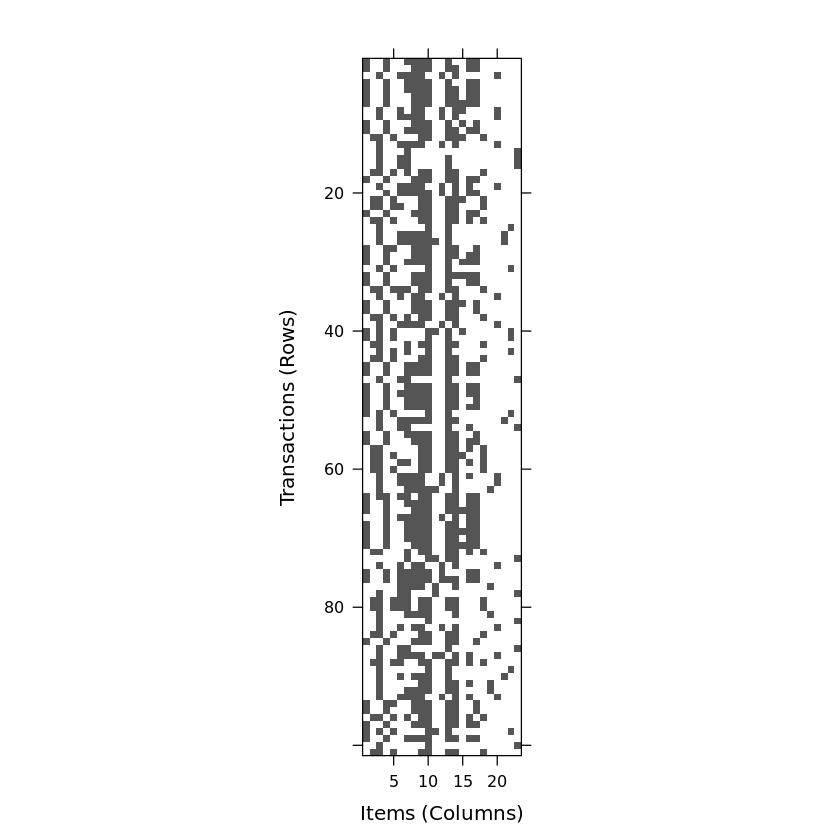

In [11]:
image(trans)

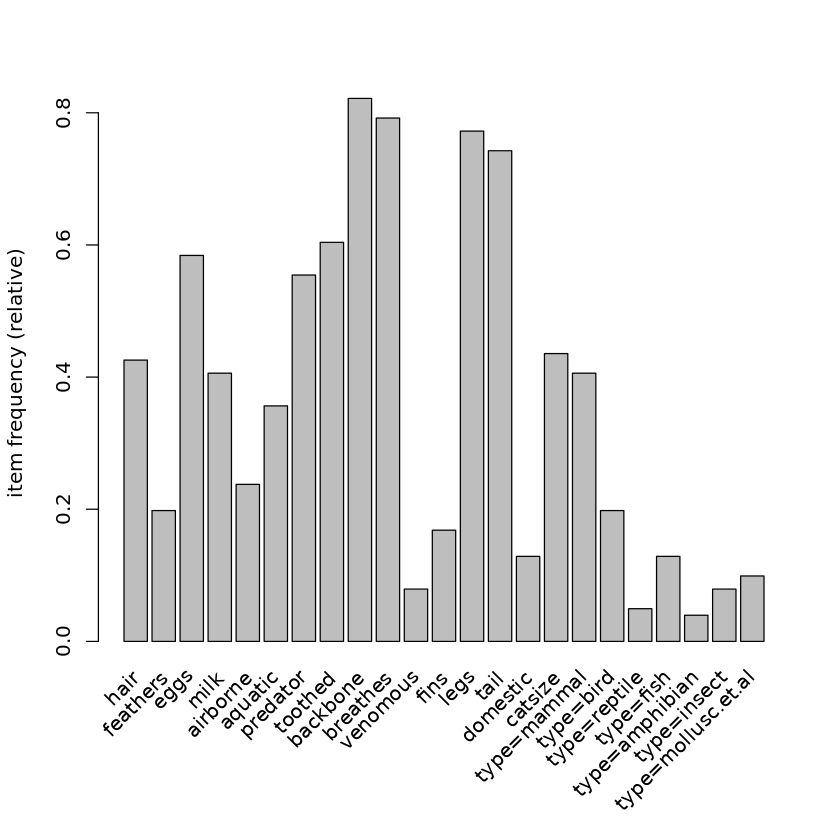

In [12]:
itemFrequencyPlot(trans)

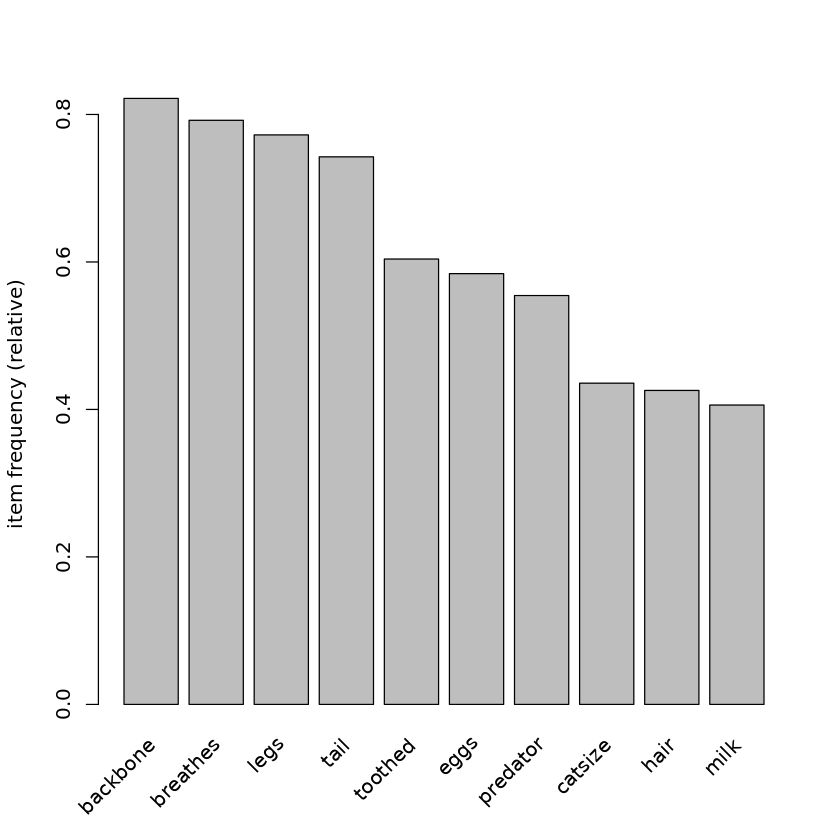

In [13]:
itemFrequencyPlot(trans, topN = 10)

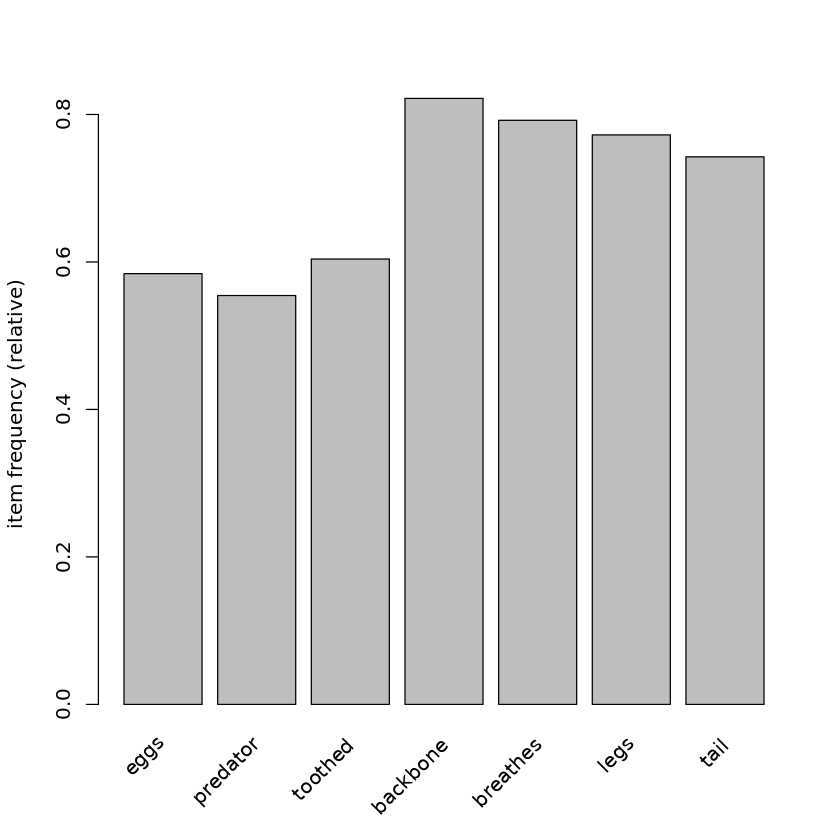

In [14]:
itemFrequencyPlot(trans, support=0.5)

# Frequent Itemsets

Even for such a  toy data, the search space is huge:

In [15]:
2^ncol(trans)

[1] 8388608

In [16]:
its <- apriori(trans, parameter=list(target = "frequent", support = 0.05))
its

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5    0.05      1
 maxlen            target  ext
     10 frequent itemsets TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 5 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[23 item(s), 101 transaction(s)] done [0.00s].
sorting and recoding items ... [21 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 7 8 9 10

Warning message in apriori(trans, parameter = list(target = "frequent", support = 0.05)):
“Mining stopped (maxlen reached). Only patterns up to a length of 10 returned!”


 done [0.00s].
sorting transactions ... done [0.00s].
writing ... [2537 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 2537 itemsets 

In [17]:
its <- sort(its, by = "support")
inspect(head(its))

    items           support   transIdenticalToItemsets count
[1] {backbone}      0.8217822 0                        83   
[2] {breathes}      0.7920792 0                        80   
[3] {legs}          0.7722772 0                        78   
[4] {tail}          0.7425743 0                        75   
[5] {backbone,tail} 0.7326733 0                        74   
[6] {breathes,legs} 0.7227723 0                        73   


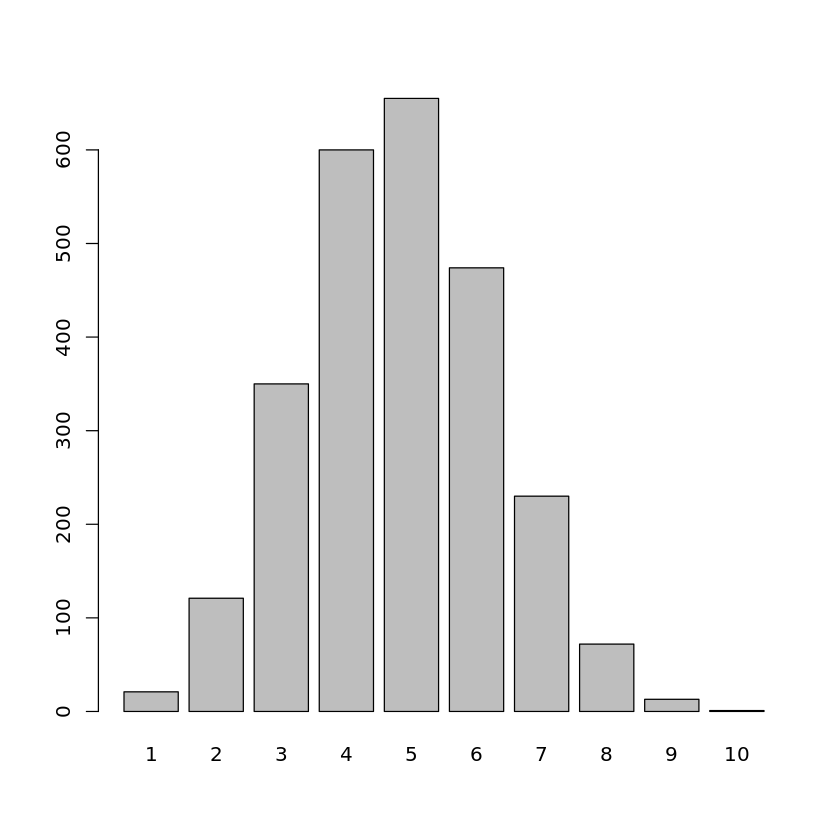

In [18]:
barplot(table(size(its)))

In [19]:
inspect(its[size(its) > 8])

     items            support transIdenticalToItemsets count
[1]  {hair,                                                 
      milk,                                                 
      toothed,                                              
      backbone,                                             
      breathes,                                             
      legs,                                                 
      tail,                                                 
      catsize,                                              
      type=mammal} 0.23762376               0.06930693    24
[2]  {hair,                                                 
      milk,                                                 
      predator,                                             
      toothed,                                              
      backbone,                                             
      breathes,                                             
      legs,             

In [20]:
?is.maximal

In [21]:
its_max <- its[is.maximal(its)]
its_max

set of 22 itemsets 

In [22]:
inspect(head(its_max))

    items            support transIdenticalToItemsets count
[1] {hair,                                                 
     milk,                                                 
     predator,                                             
     toothed,                                              
     backbone,                                             
     breathes,                                             
     legs,                                                 
     tail,                                                 
     catsize,                                              
     type=mammal} 0.12871287               0.09900990    13
[2] {eggs,                                                 
     aquatic,                                              
     predator,                                             
     toothed,                                              
     backbone,                                             
     fins,                              

In [23]:
?is.closed

In [24]:
its_closed <- its[is.closed(its)]
its_closed

set of 230 itemsets 

In [25]:
inspect(head(its_closed))

    items           support   transIdenticalToItemsets count
[1] {backbone}      0.8217822 0                        83   
[2] {breathes}      0.7920792 0                        80   
[3] {legs}          0.7722772 0                        78   
[4] {tail}          0.7425743 0                        75   
[5] {backbone,tail} 0.7326733 0                        74   
[6] {breathes,legs} 0.7227723 0                        73   


# Association Rules

In [26]:
rules=apriori(trans, parameter=list(support=0.05, confidence=0.9))
rules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.9    0.1    1 none FALSE            TRUE       5    0.05      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 5 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[23 item(s), 101 transaction(s)] done [0.00s].
sorting and recoding items ... [21 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 7 8 9 10

Warning message in apriori(trans, parameter = list(support = 0.05, confidence = 0.9)):
“Mining stopped (maxlen reached). Only patterns up to a length of 10 returned!”


 done [0.00s].
writing ... [7174 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 7174 rules 

In [27]:
inspect(head(rules))

    lhs                     rhs        support    confidence coverage  
[1] {type=insect}        => {eggs}     0.07920792 1.0        0.07920792
[2] {type=insect}        => {legs}     0.07920792 1.0        0.07920792
[3] {type=insect}        => {breathes} 0.07920792 1.0        0.07920792
[4] {type=mollusc.et.al} => {eggs}     0.08910891 0.9        0.09900990
[5] {type=fish}          => {fins}     0.12871287 1.0        0.12871287
[6] {type=fish}          => {aquatic}  0.12871287 1.0        0.12871287
    lift     count
[1] 1.711864  8   
[2] 1.294872  8   
[3] 1.262500  8   
[4] 1.540678  9   
[5] 5.941176 13   
[6] 2.805556 13   


In [28]:
quality(head(rules))

,support,confidence,coverage,lift,count
,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0.07920792,1.0,0.07920792,1.711864,8
2,0.07920792,1.0,0.07920792,1.294872,8
3,0.07920792,1.0,0.07920792,1.262500,8
4,0.08910891,0.9,0.09900990,1.540678,9
5,0.12871287,1.0,0.12871287,5.941176,13
6,0.12871287,1.0,0.12871287,2.805556,13


In [29]:
interestMeasure(head(rules), measure = c("phi", "gini"), trans = trans)

phi,gini
<dbl>,<dbl>
0.2474584,0.029750404
0.1592649,0.008921748
0.1502686,0.007437601
0.2124317,0.021924375
0.8543691,0.204364991
0.5164589,0.122369910


In [30]:
rules <- sort(rules, by = "lift")
inspect(head(rules))

    lhs                     rhs         support    confidence coverage  
[1] {eggs,fins}          => {type=fish} 0.12871287 1          0.12871287
[2] {eggs,aquatic,fins}  => {type=fish} 0.12871287 1          0.12871287
[3] {eggs,predator,fins} => {type=fish} 0.08910891 1          0.08910891
[4] {eggs,toothed,fins}  => {type=fish} 0.12871287 1          0.12871287
[5] {eggs,fins,tail}     => {type=fish} 0.12871287 1          0.12871287
[6] {eggs,backbone,fins} => {type=fish} 0.12871287 1          0.12871287
    lift     count
[1] 7.769231 13   
[2] 7.769231 13   
[3] 7.769231  9   
[4] 7.769231 13   
[5] 7.769231 13   
[6] 7.769231 13   


# Visualization

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



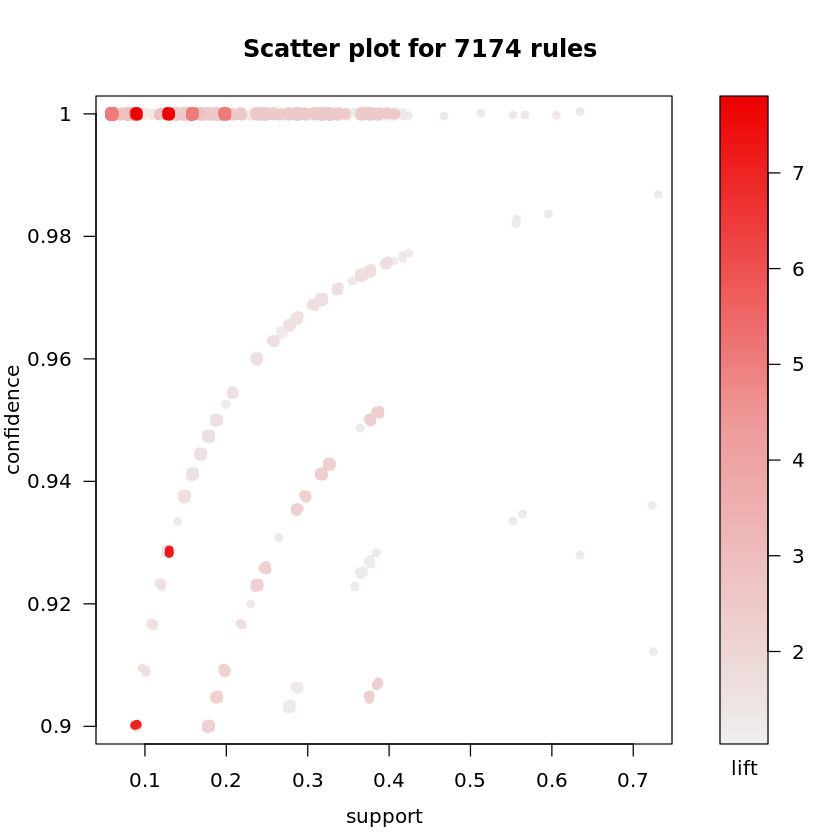

In [31]:
plot(rules)

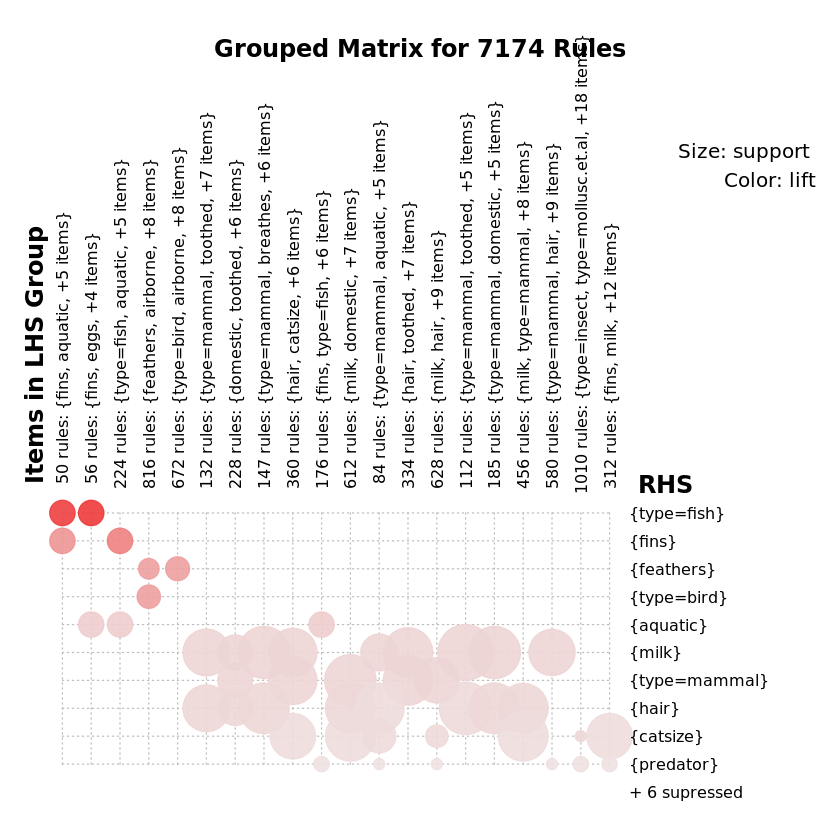

In [32]:
plot(rules, method = "grouped")

Warning message:
“plot: Too many rules supplied. Only plotting the best 100 rules using ‘support’ (change control parameter max if needed)”


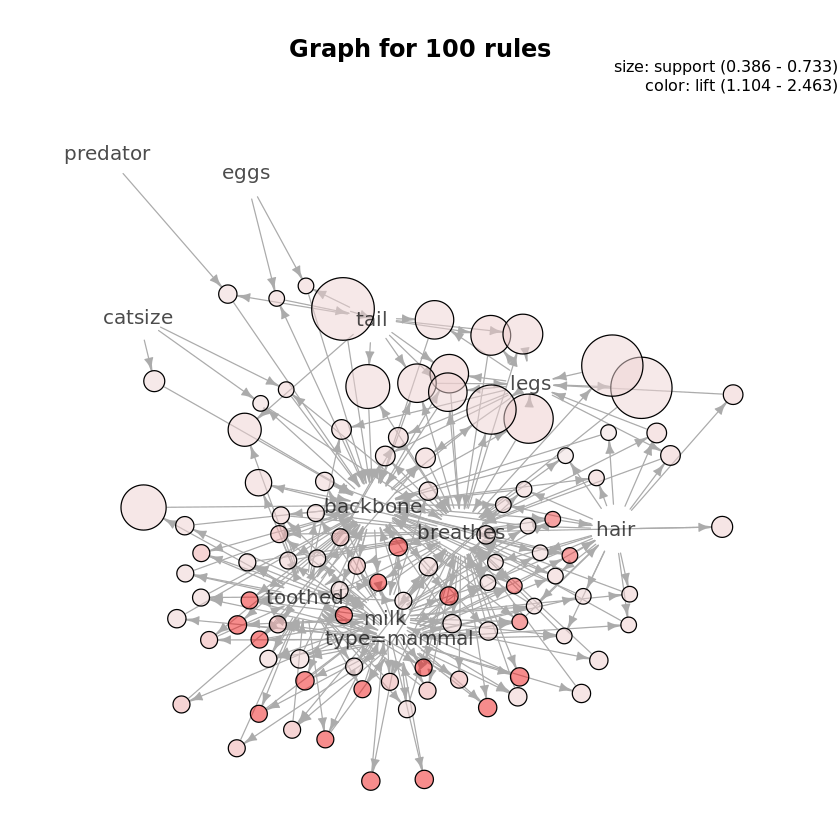

In [33]:
plot(rules, method = "graph")

The plots can be interactive. Please check documentation of package `arulesViz`.